In [1]:
#!pip install -U spaCy
#!python -m spacy download en

In [2]:
from helper_code.book import *
import spacy
import re
from spacy import displacy
nlp = spacy.load('en')

from pylab import rcParams
%matplotlib inline

### Download "ALICE'S ADVENTURES IN WONDERLAND" book from http://www.gutenberg.org/ebooks/search/?sort_order=downloads and split into chapters

In [3]:
#sherlock_holmes_book = get_gutenberg_text(1661)
alice_book = get_gutenberg_text(11)

In [4]:
print(alice_book)

ALICE'S ADVENTURES IN WONDERLAND

Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0




CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversations?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure
of making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her.

There was nothing so VERY remarkable in that; nor did Alice think it so
VERY much out of the way to hear the Rabbit say to itself, 'Oh dear!
Oh dear! I shall be late!' (when she thought it over afterwards, it
occurred to her that she ought to have wondered at this, but at the time
it

In [5]:
len(alice_book)

144430

In [6]:
alice_book[0]

'A'

In [7]:
chapters = re.split("CHAPTER\s+[IVXLCDM]+.", alice_book)

# strip off any whitespace at the very beginning and very end of each chapter.
chapters = [chapter.strip() for chapter in chapters]
#remove tabs"
chapters = [re.sub("\n", " ", c) for c in chapters]

#number of chapters
print(len(chapters))

13


In [8]:
print(chapters[0])

ALICE'S ADVENTURES IN WONDERLAND  Lewis Carroll  THE MILLENNIUM FULCRUM EDITION 3.0


In [9]:
#Its not actually a chapter, we will remove it
chapters.pop(0)

"ALICE'S ADVENTURES IN WONDERLAND  Lewis Carroll  THE MILLENNIUM FULCRUM EDITION 3.0"

### Applying NLP to get words properties

In [10]:
first_chapter_tokens = nlp(chapters[0])

for token in first_chapter_tokens[:20]:
    print(f"{token.text:>15}: {token.pos_} {token.ent_type_} {token.sentiment} {token.lemma_.strip().lower()}")

           Down: ADP  0.0 down
            the: DET  0.0 the
         Rabbit: PROPN  0.0 rabbit
              -: PUNCT  0.0 -
           Hole: PROPN  0.0 hole
               : SPACE  0.0 
          Alice: PROPN PERSON 0.0 alice
            was: VERB  0.0 be
      beginning: VERB  0.0 begin
             to: PART  0.0 to
            get: VERB  0.0 get
           very: ADV  0.0 very
          tired: ADJ  0.0 tired
             of: ADP  0.0 of
        sitting: VERB  0.0 sit
             by: ADP  0.0 by
            her: DET  0.0 -pron-
         sister: NOUN  0.0 sister
             on: ADP  0.0 on
            the: DET  0.0 the


In [33]:
test = nlp("good bad")

for token in test:
    print(f"{token.text:>15}: {token.pos_} {token.ent_type_} {token.sentiment} {token.lemma_.strip().lower()}")

           good: ADJ  0.0 good
            bad: ADJ  0.0 bad


In [11]:
#displacy.render(first_chapter_tokens, style='ent', jupyter=True)

### Create dataset ready fro processing selecting only nouns, proper nouns,verbs and adjectives:

- **text**: token.text,
- **part-of-speech**: 
- **named_ent_type**: 
- **sentiment**: 
- **lemma**:
- **chapter**:

In [12]:
alice_book_df = pd.DataFrame(columns=["text", "part-of-speech","named_ent_type","sentiment","lemma","chapter"])
for i in range(len(chapters)):
    chapter_tokens = nlp(chapters[i])
    for token in chapter_tokens:
        if ((token.pos_=="VERB") | (token.pos_=="NOUN") | (token.pos_=="ADJ") | (token.pos_== "PROPN")):
             alice_book_df = alice_book_df.append({"text": token.text,
                             "part-of-speech":  token.pos_,
                             "named_ent_type": token.ent_type_,
                             "sentiment" : token.sentiment,
                             "lemma" : token.lemma_.strip().lower(),
                             "chapter": i+1
                              }, ignore_index=True)

In [13]:
alice_book_df.head()

,text,part-of-speech,named_ent_type,sentiment,lemma,chapter
0,Rabbit,PROPN,,0.0,rabbit,1
1,Hole,PROPN,,0.0,hole,1
2,Alice,PROPN,PERSON,0.0,alice,1
3,was,VERB,,0.0,be,1
4,beginning,VERB,,0.0,begin,1


In [14]:
alice_book_df.shape

(12488, 6)

## Number of adjective/nound and verbs

### How many adjectives/nound and verbs are there overall 
### How many adjectives/nound and verbs per chapter

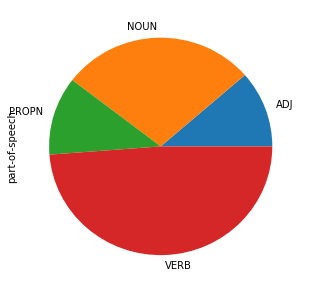

In [15]:
rcParams['figure.figsize'] = 5, 5
alice_book_df["part-of-speech"].groupby(alice_book_df["part-of-speech"]).count().plot(kind="pie")

In [16]:
alice_book_df.groupby(["chapter", "part-of-speech"]).size().reset_index(name="count").set_index("chapter")

,part-of-speech,count
chapter,,
1,ADJ,126
1,NOUN,302
1,PROPN,58
1,VERB,476
2,ADJ,150
2,NOUN,280
2,PROPN,89
2,VERB,479
3,ADJ,97


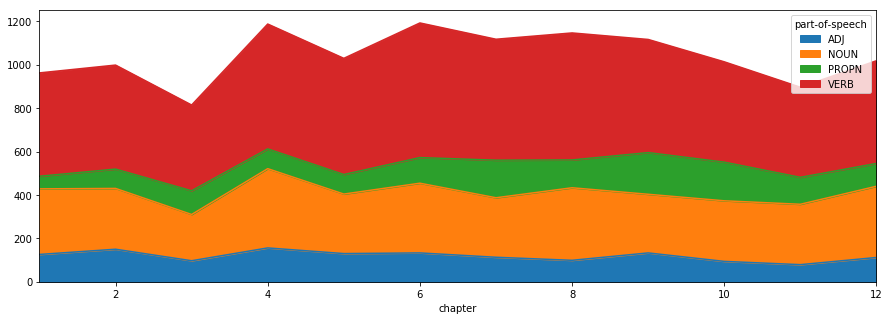

In [17]:
rcParams['figure.figsize'] = 15, 5
alice_book_df.groupby(["chapter", "part-of-speech"]).size().reset_index(name="count").\
              pivot(index="chapter", columns='part-of-speech')['count'].reset_index().set_index("chapter").plot.area()

## Most common words

### Find the most common word overall and plot top 10 most common words using "lemma" column
### Find the 10 most common words using "text" column

In [18]:
alice_book_df["lemma"].groupby(alice_book_df["lemma"]).count().reset_index(name='count').\
                       sort_values(['count'], ascending=False).head(10)

,lemma,count
106,be,1060
1292,say,528
41,alice,396
685,have,335
409,do,260
638,go,180
1537,think,130
885,little,126
628,get,113
899,look,106


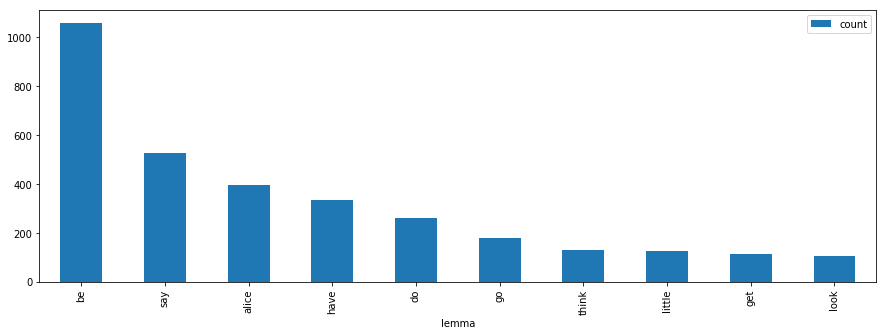

In [19]:
rcParams['figure.figsize'] = 15, 5
alice_book_df["lemma"].groupby(alice_book_df["lemma"]).count().reset_index(name='count').set_index("lemma").\
                       sort_values(['count'], ascending=False).head(10).plot.bar()

In [20]:
alice_book_df["text"].groupby(alice_book_df["text"]).count().reset_index(name='count').\
                       sort_values(['count'], ascending=False).head(10)

,text,count
1942,said,453
16,Alice,394
2445,was,363
1195,had,184
498,be,144
3,'s,135
1454,little,123
867,do,118
1324,is,97
2468,were,86


### Use "lemma" column and "part-of-speech" column and see for the most common words - what part of speach they are:

In [21]:
alice_book_df.groupby(["lemma", "part-of-speech"]).size().reset_index(name="count"). \
              sort_values(['count'], ascending=False).head(10)

,lemma,part-of-speech,count
114,be,VERB,1060
1466,say,VERB,528
44,alice,PROPN,396
766,have,VERB,335
451,do,VERB,260
712,go,VERB,180
1745,think,VERB,130
983,little,ADJ,124
702,get,VERB,113
918,know,VERB,103


###  Find the top 10 most common adjectives (use text)

In [22]:
alice_book_df[alice_book_df["part-of-speech"]=="ADJ"]["text"].groupby(alice_book_df["text"]).count().reset_index(name='count').\
                       sort_values(['count'], ascending=False).head(10)#.set_index("text").plot.bar()

,text,count
190,little,123
237,other,40
137,great,39
177,large,33
133,good,26
180,last,26
211,more,26
251,poor,25
284,same,23
193,long,22


### Find the top 10 common nouns

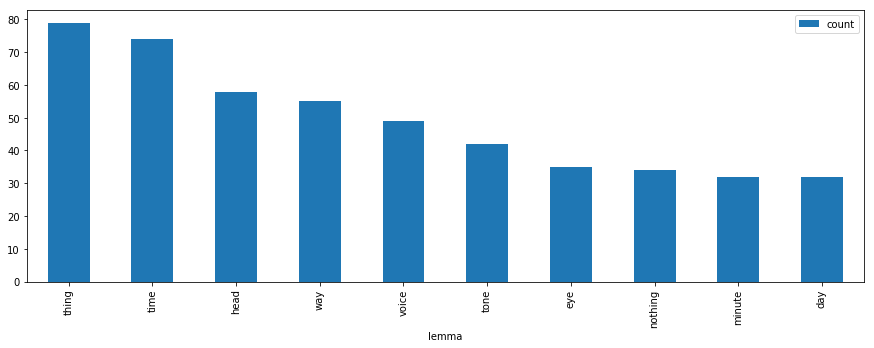

In [23]:
rcParams['figure.figsize'] = 15, 5
alice_book_df[alice_book_df["part-of-speech"]=="NOUN"]["lemma"].groupby(alice_book_df["lemma"]).count().reset_index(name='count').\
                       sort_values(['count'], ascending=False).head(10).set_index("lemma").plot.bar()

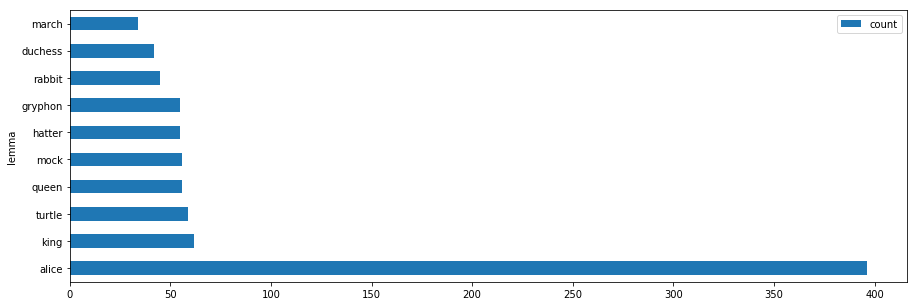

In [24]:
alice_book_df[alice_book_df["part-of-speech"]=="PROPN"]["lemma"].groupby(alice_book_df["lemma"]).count().reset_index(name='count').\
                       sort_values(['count'], ascending=False).head(10).set_index("lemma").plot.barh()

In [25]:
top_10_nouns = list(alice_book_df[alice_book_df["part-of-speech"]=="PROPN"]["lemma"].groupby(alice_book_df["lemma"]).count().reset_index(name='count').\
                             sort_values(['count'], ascending=False).head(10)['lemma'])
top_10_nouns

['alice',
 'king',
 'turtle',
 'queen',
 'mock',
 'hatter',
 'gryphon',
 'rabbit',
 'duchess',
 'march']

### For the top 10 most common  nouns - how the number vary from chapter to chapter

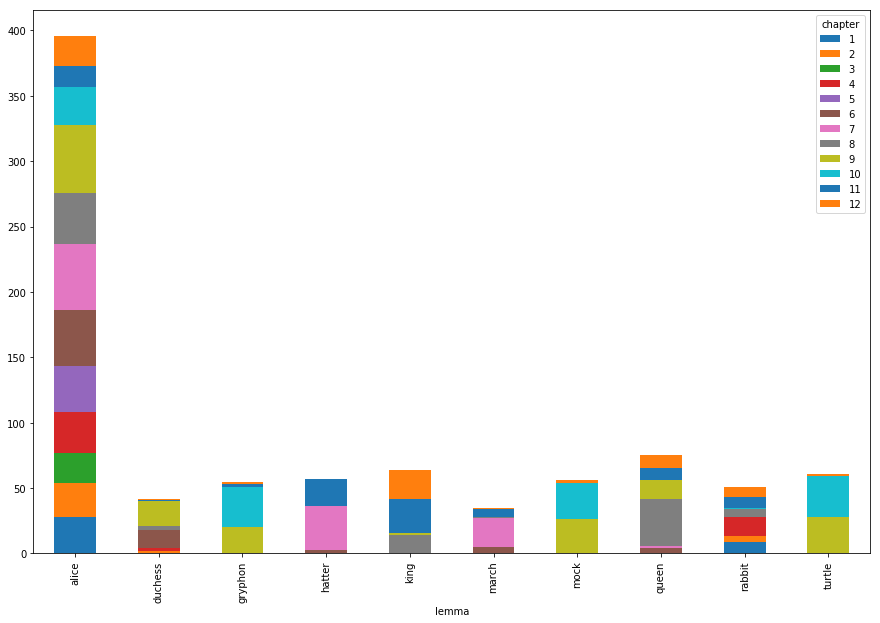

In [26]:
rcParams['figure.figsize'] = 15, 10
alice_book_df[alice_book_df["lemma"].isin(top_10_nouns)].groupby(["chapter", "lemma"]).size().reset_index(name="count").\
                                                      pivot(index="lemma", columns='chapter')['count'].reset_index().set_index("lemma").plot.bar(stacked=True)

## Named entity types (named_ent_type)

### How many different named antity types are there

### Print all words for entityt type = "PERSON"


In [27]:
alice_book_df["named_ent_type"].replace('', np.nan, inplace=True)
alice_book_df1=alice_book_df.dropna(subset=['named_ent_type'])

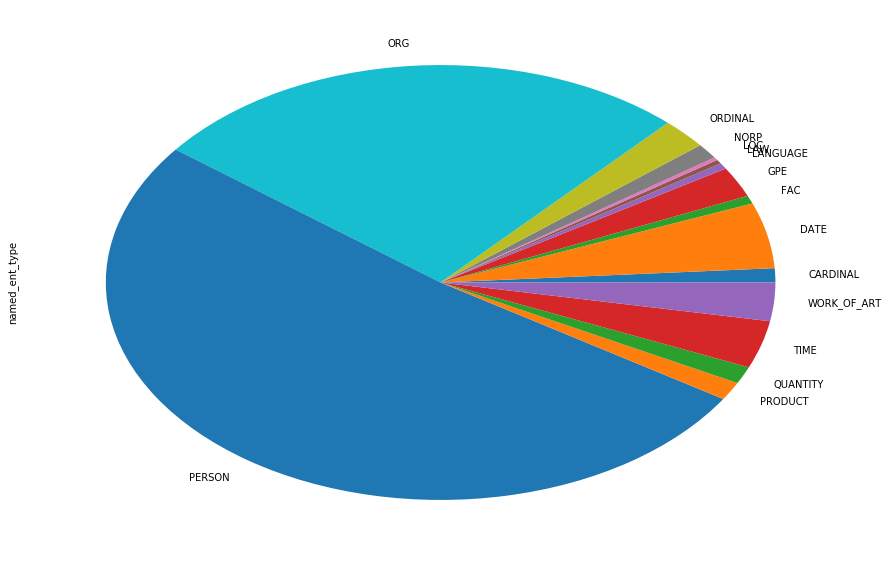

In [28]:
#rcParams['figure.figsize'] = 5, 5
alice_book_df1["named_ent_type"].groupby(alice_book_df1["named_ent_type"]).count().plot(kind="pie")

In [29]:
alice_book_df[alice_book_df["named_ent_type"]=="PERSON"][["lemma"]].groupby("lemma").size().reset_index(name="count").set_index("lemma").\
sort_values(['count'], ascending=False).head(20)#.plot(kind="pie",subplots=True)

,count
lemma,
alice,375
gryphon,55
queen,43
rabbit,21
duchess,18
bill,15
dinah,12
majesty,10
knave,8


### Sentiment by chapter (did not work, all sentiments are equal to zero)

In [30]:
alice_book_df.groupby(["chapter"])["sentiment"].sum()#.reset_index(name="count")

chapter
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
Name: sentiment, dtype: float64

In [31]:
alice_book_df["sentiment"].unique()

array([0.])